In [ ]:
'''
Bienvenue sur ce notebook.
J'ai codé un SMA Covid.
Les résultats de la simulation arrivent dans le fichier log.txt

Les paramètres utilisés sont dans le fichier config.txt





'''

In [24]:
import pandas as pd
from statistics import mean

dfHosp = pd.read_csv('current-covid-patients-hospital.csv')
dfRea = pd.read_csv('current-covid-patients-icu.csv')
#print(dfHosp.to_string())
#print(dfRea.to_string())

dfMerge = dfHosp.merge(dfRea)
#print(dfMerge)
"""
dfMerge

print(dfMerge["NbHosp"])
print(dfMerge["NbRea"])
"""
listNbHosp = dfMerge["NbHosp"].tolist()
listNbRea = dfMerge["NbRea"].tolist()

listRatioReaHosp = [ nbRea/nbHosp for nbHosp,nbRea in zip(listNbHosp,listNbRea) ]
print(len(listRatioReaHosp))
string = "double ratioHospRea[633] =  {"

for i in listRatioReaHosp:
    string = string + str(i) + ","
    
string += "};"

print(string)

print(mean(listRatioReaHosp)) ##0.1474089554531037

633
double ratioHospRea[633] =  {0.0,0.25,0.4,0.3333333333333333,0.3333333333333333,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.125,0.08333333333333333,0.10465116279069768,0.07758620689655173,0.2710352849941838,0.25942126514131897,0.24601031180947705,0.24818216609261384,0.24627118644067797,0.24072476272648835,0.2398247434567047,0.24628554560661223,0.2431245858184228,0.24144390806254054,0.2393478122412585,0.24095563139931742,0.23779193205944799,0.24138260288360547,0.2424135497529993,0.24202420242024203,0.2412842983429643,0.2401289282836422,0.24008141984787343,0.23859881031064112,0.2349758192701816,0.23447490877439658,0.23228646126352714,0.22664009409304756,0.221004243281471,0.21669501588626078,0.21203221222169588,0.2093765648472709,0.2053779838784974,0.20020238434051166,0.19693956114461697,0.19065709410514795,0.18787481566442732,0.1851341599422686,0.1

In [3]:
!g++ -O2 -c Position.cpp Human.cpp RandMT.cpp World.cpp main.cpp

In [4]:
!g++ -O2 Human.o main.o Position.o RandMT.o World.o -o exe

In [ ]:
!./exe

In [114]:
listNumIteration = []
listNbNouvCas = []
listNbPersonneHosp = []
listNbPersonneRea = []
listNbNouvHosp = []
listNbNouvRea = []
listNbNouvMort = []
nbCasCovidConnuTotal = 0
listAgeMort = []
listAgeNouvCasSymptomatique = []


f = open("log.txt", "r")
fileLines = f.readlines()
i = 0
for line in fileLines:
    if("##" not in line):
        if(i == 0):
            listNumIteration.append(int(line))
            i = i + 1
        elif(i==1):
            listNbNouvCas.append(int(line))
            i = i + 1
        elif(i==2):
            listNbPersonneHosp.append(int(line))
            i = i + 1
        elif(i==3):
            listNbPersonneRea.append(int(line))
            i = i + 1
        elif(i==4):
            listNbNouvHosp.append(int(line))
            i = i + 1
        elif(i==5):
            listNbNouvRea.append(int(line))
            i = i + 1
        elif(i==6):
            listNbNouvMort.append(int(line))
            i = i + 1
        elif(i==7):
            nbCasCovidConnuTotal = (int(line))
            i = i + 1
        elif("AgeC:" in line):
            listSplit = line.split(":")
            listAgeNouvCasSymptomatique.append(int(listSplit[1]))
        elif("AgeD:" in line):
            listSplit = line.split(":")
            listAgeMort.append(int(listSplit[1]))
    else:
        i = 0
        


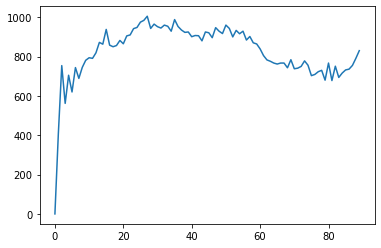

In [115]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(listNumIteration, listNbNouvCas)  # Matplotlib plot.

#plt.plot(listNumIteration, listNbNouvHosp)

#plt.plot(listNumIteration, listNbNouvRea)

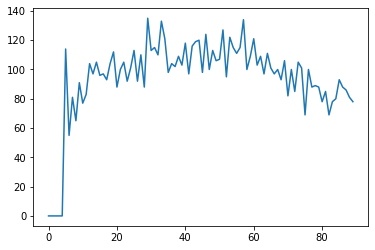

In [116]:
plt.plot(listNumIteration, listNbNouvHosp)



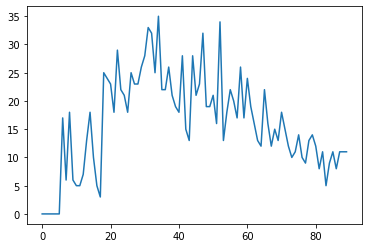

In [117]:
plt.plot(listNumIteration, listNbNouvRea)

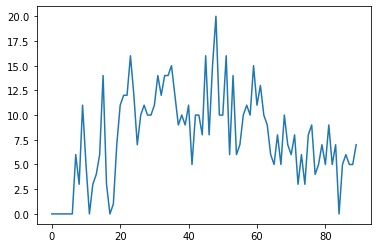

In [118]:
plt.plot(listNumIteration, listNbNouvMort)

In [119]:
nbMortTotal = sum(listNbNouvMort)
tauxDeMortCasConnu = (nbMortTotal / nbCasCovidConnuTotal) * 100

print("Le taux de mort de cas connu est de : " + str(tauxDeMortCasConnu) + "%")

## IL ME FAUT L'AGE DES GENS CONTAMINE AUSSI ... 

Le taux de mort de cas connu est de : 0.9733529193723315%


In [120]:
nbAge0 = 0
nbAge1 = 0
nbAge2 = 0
nbAge3 = 0
nbAge4 = 0
nbAge5 = 0
nbAge6 = 0
nbAge7 = 0

for i in listAgeNouvCasSymptomatique:
    if i == 0:
        nbAge0 = nbAge0 + 1
    elif i == 1:
        nbAge1 = nbAge1 + 1
    elif i == 2:
        nbAge2 = nbAge2 + 1
    elif i == 3:
        nbAge3 = nbAge3 + 1
    elif i == 4:
        nbAge4 = nbAge4 + 1
    elif i == 5:
        nbAge5 = nbAge5 + 1
    elif i == 6:
        nbAge6 = nbAge6 + 1
    elif i == 7:
        nbAge7 = nbAge7 + 1

        
nbAgeMort0 = 0
nbAgeMort1 = 0
nbAgeMort2 = 0
nbAgeMort3 = 0
nbAgeMort4 = 0
nbAgeMort5 = 0
nbAgeMort6 = 0
nbAgeMort7 = 0

for i in listAgeMort:
    if i == 0:
        nbAgeMort0 = nbAgeMort0 + 1
    elif i == 1:
        nbAgeMort1 = nbAgeMort1 + 1
    elif i == 2:
        nbAgeMort2 = nbAgeMort2 + 1
    elif i == 3:
        nbAgeMort3 = nbAgeMort3 + 1
    elif i == 4:
        nbAgeMort4 = nbAgeMort4 + 1
    elif i == 5:
        nbAgeMort5 = nbAgeMort5 + 1
    elif i == 6:
        nbAgeMort6 = nbAgeMort6 + 1
    elif i == 7:
        nbAgeMort7 = nbAgeMort7 + 1
    

In [121]:
print("Le taux de mortalité pour les 0 - 15 ans est de : " + str( (nbAgeMort0/nbAge0) * 100) + "%") 
print("Le taux de mortalité pour les 15 - 25 ans est de : " + str( (nbAgeMort1/nbAge1) * 100) + "%") 
print("Le taux de mortalité pour les 25 - 35 ans est de : " + str( (nbAgeMort2/nbAge2) * 100) + "%") 
print("Le taux de mortalité pour les 35 - 45 ans est de : " + str( (nbAgeMort3/nbAge3) * 100) + "%") 
print("Le taux de mortalité pour les 45 - 55 ans est de : " + str( (nbAgeMort4/nbAge4) * 100) + "%") 
print("Le taux de mortalité pour les 55 - 65 ans est de : " + str( (nbAgeMort5/nbAge5) * 100) + "%") 
print("Le taux de mortalité pour les 65 - 75 ans est de : " + str( (nbAgeMort6/nbAge6) * 100) + "%") 
print("Le taux de mortalité pour les 75 + ans est de : " + str( (nbAgeMort7/nbAge7) * 100) + "%") 

Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.046436034362665427%
Le taux de mortalité pour les 25 - 35 ans est de : 0.09477550053311219%
Le taux de mortalité pour les 35 - 45 ans est de : 0.15113893986829322%
Le taux de mortalité pour les 45 - 55 ans est de : 0.4085480829666876%
Le taux de mortalité pour les 55 - 65 ans est de : 1.0107668644254009%
Le taux de mortalité pour les 65 - 75 ans est de : 2.5154130702836004%
Le taux de mortalité pour les 75 + ans est de : 5.131229725744618%
